In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

In [2]:
data = pd.read_csv("DataByMinute.csv")
wholeGameData = pd.read_csv("WholeGameData.csv")
moreSeasons = pd.read_csv("moreSeasonsGame.csv")

In [3]:
leagueGames = wholeGameData[wholeGameData.get("Competition") == "United States. NCAA D1 Big West"].drop("Competition",axis =1)
seasonStats = pd.read_csv("SeasonStats.csv").set_index("Team")

In [4]:
seasonStats

,Points,Duration,Aerial duels,Aerial duels accuracy,Aerial duels won,Average pass length,Average passes per possession,Average shot distance,Back passes,Back passes accuracy,...,Smart passes,Smart passes accuracy,Smart passes accurate,Smart passes percentage,Throw in percentage,Throw ins,Throw ins accurate,Touches in penalty area,Yellow cards,xG
Team,,,,,,,,,,,,,,,,,,,,,
CSU Bakersfield Roadrunners,11,100.777778,46.777778,0.432778,20.444444,21.048889,3.225556,19.128889,61.444444,0.931702,...,1.333333,0.346154,0.555556,0.001711,0.870192,24.666667,22.000000,14.777778,1.111111,1.361111
CSUN Matadors,10,100.555556,46.222222,0.482456,24.333333,21.378889,2.683333,20.398889,36.777778,0.906977,...,1.222222,0.166667,0.222222,0.000808,0.810000,22.888889,19.000000,14.444444,2.444444,1.430000
Cal Poly Mustangs,12,98.700000,65.100000,0.440694,27.900000,22.617000,2.701000,16.914000,48.000000,0.905172,...,1.700000,0.185185,0.300000,0.001207,0.828625,30.800000,26.400000,16.300000,1.700000,1.364000
Cal State Fullerton Titans,19,105.600000,47.600000,0.414286,19.100000,20.560000,3.087000,20.026000,54.800000,0.893688,...,2.400000,0.450000,0.800000,0.003414,0.847656,28.100000,24.900000,20.300000,1.800000,1.364000
Sacramento State Hornets,7,99.444444,40.444444,0.503096,19.555556,21.053333,3.298889,18.023333,51.444444,0.905782,...,4.222222,0.229508,0.888889,0.002589,0.793103,22.333333,16.888889,16.333333,1.888889,1.151111
UC Davis Aggies,13,102.750000,58.583333,0.485409,28.166667,22.442500,2.705833,19.497500,51.166667,0.912121,...,1.500000,0.266667,0.416667,0.001588,0.914530,25.916667,23.250000,17.166667,1.250000,1.029167
UC Irvine Anteaters,16,102.727273,37.363636,0.430700,16.181818,19.515455,3.670909,18.989091,61.545455,0.914463,...,3.545455,0.367347,1.272727,0.002503,0.939457,22.272727,21.090909,17.636364,1.909091,1.443636
UC Riverside Highlanders,12,105.900000,44.000000,0.446194,19.400000,21.018000,3.371000,18.907000,62.300000,0.918498,...,2.400000,0.282051,0.500000,0.001869,0.906566,23.800000,21.600000,12.600000,2.500000,1.151000
UC San Diego Tritons,10,99.777778,42.888889,0.426154,18.444444,21.880000,2.705556,17.767778,47.555556,0.892710,...,1.444444,0.526316,0.777778,0.002740,0.837912,26.444444,22.444444,16.555556,1.555556,1.342222


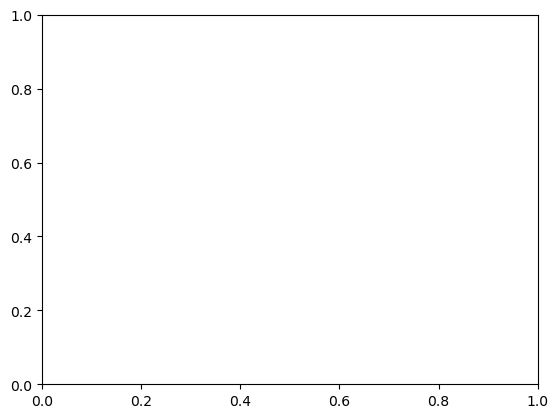

In [5]:
#General league shapes in stats
stats_ = seasonStats.columns.tolist()[3:]
lowValueStats = ['Conceded goals','Losses','Losses High','Losses Low','Losses Medium','PPDA','Shots against','Shots against on target','Shots against on target percentage']
for stat in stats_:
    plt.hist(seasonStats.get(stat),bins = 12,density=True)
    ucsdAvg = seasonStats.loc["UC San Diego Tritons"].get(stat)
    if stat in lowValueStats:
        ascend = True
    else:
        ascend = False
    sorted = seasonStats.sort_values(stat,ascending=ascend)
    sorted.head()
    highestTeam = sorted.index[0]
    highestVal = sorted.get(stat).iloc[0]
    plt.axvline(ucsdAvg, color="blue", linestyle="--",label = "UCSD")
    plt.axvline(highestVal, color="red", linestyle="--",label = "Best Value - "+highestTeam)
    plt.title("Distribution of "+stat)
    plt.xlabel("Average " +stat + " per Game")
    plt.legend()
    plt.savefig("Histograms/"+stat+"Histogram.png")
    plt.cla()


In [6]:
#League paramters for success
stat = "Points"
statCorr = seasonStats.corr(method="pearson").get([stat])
statCorr[(abs(statCorr).get(stat)>.5) & (statCorr.get(stat)<1)].sort_values("Points")

,Points
Long passes accuracy,-0.579200
Corners with shots percentage,-0.544568
Aerial duels accuracy,-0.517148
Losses Medium,0.502487
Shots from outside penalty area on target,0.521333
Recoveries Medium,0.531430
Offsides,0.540377
Throw in percentage,0.549612
Progressive passes,0.552190
Match tempo,0.555398


Slope: -0.6589128556945061
Corr: -0.3929087644378871


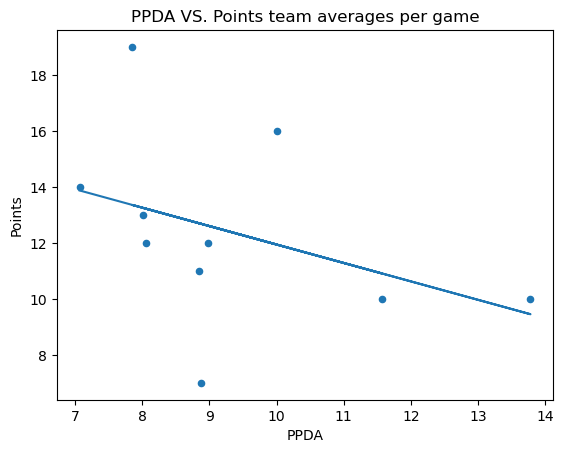

In [7]:
x = "PPDA"
y = 'Points'
slope, intercept, r, p,std_err = stats.linregress(seasonStats.get(x),seasonStats.get(y))
def predictPoint(x):
    return slope*x+intercept
predicted = seasonStats.get(x).apply(predictPoint)
seasonStats.plot(kind = "scatter",x = x,y=y)
plt.plot(seasonStats.get(x),predicted)
plt.title(x+" VS. "+y + " team averages per game")
print("Slope:",slope)
print("Corr:",r)

In [8]:
#wholeGameData[wholeGameData.get("Team")=="UC San Diego Tritons"].drop(["Date","Competition","Scheme","Match","Team"],axis = 1).corr().head(60).get(["xG","Goals","Goal differential","Shots on target","Shots","Conceded goals"])

stat = "Difference in Goals and xG"
statCorr = leagueGames.drop(["Date","Scheme","Match","Team"],axis = 1).corr(method='pearson').get([stat])
statCorr[(abs(statCorr).get(stat)>.5) & (statCorr.get(stat)<1)]



,Difference in Goals and xG
Goals,0.789437


Slope: nan
Corr: nan


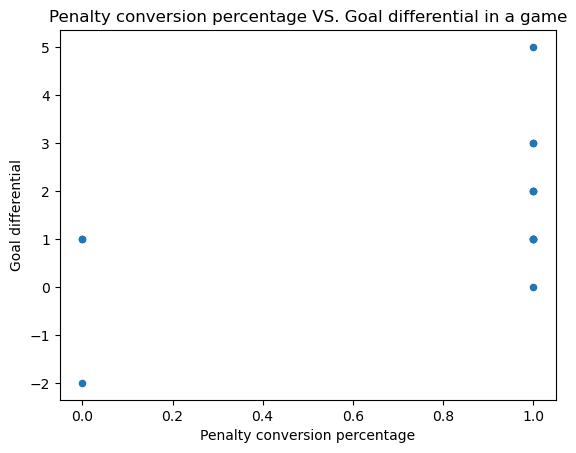

In [9]:
x = "Penalty conversion percentage"
y = 'Goal differential'
slope, intercept, r, p,std_err = stats.linregress(leagueGames.get(x),leagueGames.get(y))
def predictPoint(x):
    return slope*x+intercept
predicted = leagueGames.get(x).apply(predictPoint)
leagueGames.plot(kind = "scatter",x = x,y=y)
plt.plot(leagueGames.get(x),predicted)
plt.title(x+" VS. "+y + " in a game")
print("Slope:",slope)
print("Corr:",r)

In [10]:
stat = "Difference in Goals and xG"
statCorr = data[data.get("Competition")=="United States. NCAA D1 Big West"].drop(["Date","Competition","Scheme","Match","Team"],axis = 1).corr().get([stat])
statCorr[(abs(statCorr).get(stat)>.5) & (statCorr.get(stat)<1)]

,Difference in Goals and xG
Goal differential,0.544028
Goals,0.805879
Penalty conversion percentage,0.848244


In [36]:
model = linear_model.LinearRegression()
X = seasonStats[["Forward passes accuracy","Shots","Goals","Conceded goals","Offensive duels accuracy","Defensive duels accuracy","Deep completed passes","Crossing accuracy","Recoveries","Throw in percentage"]]
y = seasonStats["Points"]
model.fit(X,y)
model.predict([[ 0.69942857,  9.70588235,  1.17647059,  1.64705882,  0.35902376,
        0.626498  ,  4.41176471,  0.359375  , 89.41176471,  0.87878788]])

c:\Users\zcoch\miniforge3\envs\dsc80\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.61431237])

In [ ]:
#UCSD Analsis
#leagueGames = moreSeasons[moreSeasons.get("Competition") == "United States. NCAA D1 Big West"].drop("Scheme",axis=1)
ucsdGames = wholeGameData[wholeGameData.get("Match").apply(lambda match: "UC San Diego Tritons" in match)]
ucsdGamesUcsd = ucsdGames[ucsdGames.get("Team") == "UC San Diego Tritons"]
ucsdGamesOpp = ucsdGames[ucsdGames.get("Team") != "UC San Diego Tritons"]
ucsdGamesUcsd

,Date,Match,Competition,Duration,Team,Scheme,Points,Aerial duels,Aerial duels accuracy,Aerial duels won,...,Smart passes,Smart passes accuracy,Smart passes accurate,Smart passes percentage,Throw in percentage,Throw ins,Throw ins accurate,Touches in penalty area,Yellow cards,xG
11,2023-08-25,UC San Diego Tritons - Pacific Tigers 1:2,United States. NCAA D1 Non-conference matches,104,UC San Diego Tritons,4-4-1-1 (70.54%),0,45,0.466667,21,...,0,NaN,0,0.000000,0.954545,22,21,8,2,1.92
19,2023-08-27,UC San Diego Tritons - San Jose State Spartans...,United States. NCAA D1 Non-conference matches,101,UC San Diego Tritons,4-1-4-1 (50.06%),0,37,0.486486,18,...,1,1.000000,1,0.004444,0.777778,18,14,8,2,0.88
43,2023-09-01,UC San Diego Tritons - Gonzaga Bulldogs 1:1,United States. NCAA D1 Non-conference matches,95,UC San Diego Tritons,4-2-3-1 (100.0%),1,36,0.500000,18,...,0,NaN,0,0.000000,0.666667,24,16,11,2,2.48
77,2023-09-09,Denver Pioneers - UC San Diego Tritons 4:0,United States. NCAA D1 Non-conference matches,95,UC San Diego Tritons,5-3-2 (52.02%),0,17,0.352941,6,...,2,0.500000,1,0.004425,0.944444,18,17,8,0,0.66
107,2023-09-15,Santa Clara Broncos - UC San Diego Tritons 2:2,United States. NCAA D1 Non-conference matches,102,UC San Diego Tritons,3-4-2-1 (100.0%),1,73,0.424658,31,...,1,0.000000,0,0.000000,0.809524,21,17,10,2,1.59
133,2023-09-21,San Diego Toreros - UC San Diego Tritons 2:1,United States. NCAA D1 Non-conference matches,96,UC San Diego Tritons,4-3-2-1 (100.0%),0,56,0.303571,17,...,2,0.500000,1,0.003636,0.782609,23,18,10,1,1.38
162,2023-09-28,UC San Diego Tritons - UC Santa Barbara Gaucho...,United States. NCAA D1 Big West,98,UC San Diego Tritons,4-4-2 (61.1%),3,65,0.446154,29,...,4,0.500000,2,0.010929,0.722222,18,13,11,1,1.10
169,2023-10-01,Sacramento State Hornets - UC San Diego Triton...,United States. NCAA D1 Big West,96,UC San Diego Tritons,4-4-2 (100.0%),1,36,0.444444,16,...,3,0.666667,2,0.008929,0.714286,14,10,19,3,2.59
183,2023-10-05,UC San Diego Tritons - Cal State Fullerton Tit...,United States. NCAA D1 Big West,98,UC San Diego Tritons,4-2-3-1 (100.0%),0,33,0.303030,10,...,1,1.000000,1,0.005495,0.909091,22,20,23,0,1.18
189,2023-10-08,Cal Poly Mustangs - UC San Diego Tritons 3:1,United States. NCAA D1 Big West,99,UC San Diego Tritons,4-4-2 (92.68%),0,50,0.460000,23,...,0,NaN,0,0.000000,0.906977,43,39,11,0,0.21


In [13]:
ucsdGamesOpp.get("Deep completed passes").mean()

8.8

In [14]:
#League paramters for success
stat = "Conceded goals"
statCorr = ucsdGamesUcsd.drop(["Date","Match","Team","Competition","Scheme"],axis=1).corr(method="pearson").get([stat])
statCorr[(abs(statCorr).get(stat)>.5) & (statCorr.get(stat)<1)].sort_values(stat,ascending=False)

,Conceded goals
Counterattacks with shots percentage,0.761042
Throw in percentage,0.710610
Corners with shots percentage,0.624473
Aerial duels won,-0.517020
Shots on target accuracy,-0.558034
xG,-0.586630
Points,-0.656507
Yellow cards,-0.680040
Goal differential,-0.773256


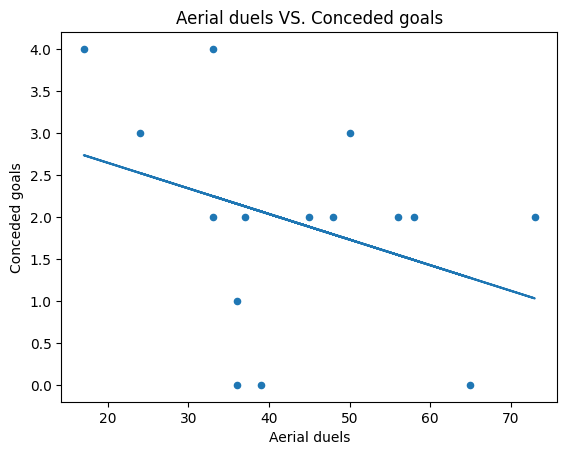

In [15]:
stats_ = ucsdGamesUcsd.columns.tolist()[7:]
for stat in stats_[:1]:
    x = stat
    y = 'Conceded goals'
    slope, intercept, r, p,std_err = stats.linregress(ucsdGamesUcsd.get(x),ucsdGamesUcsd.get(y))
    def predictPoint(x):
        return slope*x+intercept
    predicted = ucsdGamesUcsd.get(x).apply(predictPoint)
    ucsdGamesUcsd.plot(kind = "scatter",x = x,y=y)
    plt.plot(ucsdGamesUcsd.get(x),predicted)
    plt.title(x+" VS. "+y )
    plt.show()

In [16]:
ucsdGamesUcsd.get(["Match","Deep completed crosses"])

,Match,Deep completed crosses
11,UC San Diego Tritons - Pacific Tigers 1:2,5
19,UC San Diego Tritons - San Jose State Spartans...,3
43,UC San Diego Tritons - Gonzaga Bulldogs 1:1,7
77,Denver Pioneers - UC San Diego Tritons 4:0,1
107,Santa Clara Broncos - UC San Diego Tritons 2:2,4
133,San Diego Toreros - UC San Diego Tritons 2:1,8
162,UC San Diego Tritons - UC Santa Barbara Gaucho...,5
169,Sacramento State Hornets - UC San Diego Triton...,9
183,UC San Diego Tritons - Cal State Fullerton Tit...,7
189,Cal Poly Mustangs - UC San Diego Tritons 3:1,2


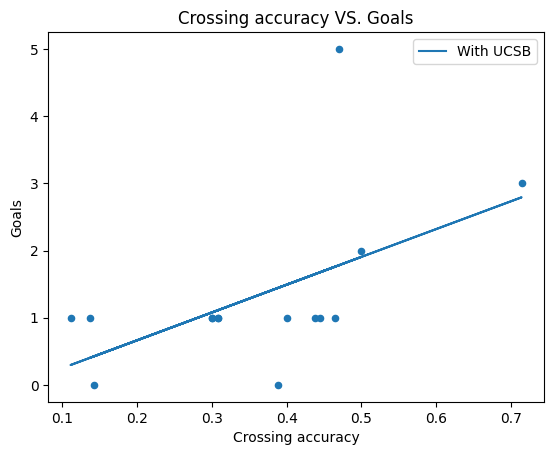

4.136344580151384
0.37783125723054


In [17]:
df = ucsdGamesUcsd
x = "Crossing accuracy"
y = 'Goals'
slope, intercept, r, p,std_err = stats.linregress(df.get(x),df.get(y))
def predictPoint(x):
    return slope*x+intercept
predicted = df.get(x).apply(predictPoint)
df.plot(kind = "scatter",x = x,y=y)
plt.plot(df.get(x),predicted, label = "With UCSB")
plt.title(x+" VS. "+y )
plt.legend()
plt.show()
print(slope)
print((1.4-intercept)/slope)

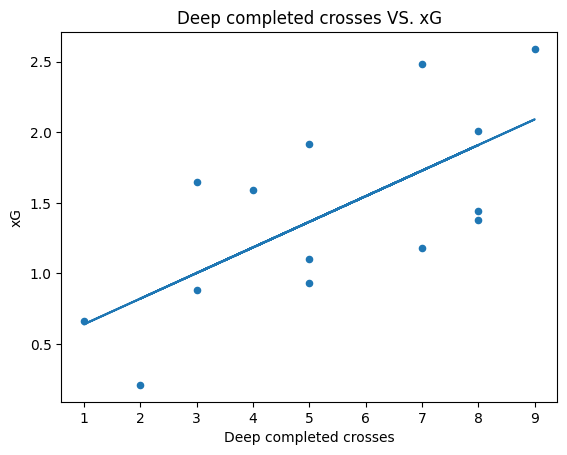

0.6811089306295316 0.18145922746781112


In [18]:
df = ucsdGamesUcsd[ucsdGamesUcsd.get("Match").apply(lambda match: "UC Davis Aggies" not in match)]
x = "Deep completed crosses"
y = 'xG'
slope, intercept, r, p,std_err = stats.linregress(df.get(x),df.get(y))
def predictPoint(x):
    return slope*x+intercept
predicted = df.get(x).apply(predictPoint)
df.plot(kind = "scatter",x = x,y=y)
plt.plot(df.get(x),predicted)
plt.title(x+" VS. "+y )
plt.show()
print(r, slope)

In [19]:
features = ["Goals","Conceded goals","Goal differential","Shots","Forward passes accuracy",'Offensive duels accuracy',"Deep completed crosses","Crosses","Yellow cards","Throw in percentage","Recoveries"]
desired = leagueGames.get(["Date","Match","Team","Points"]+features)
numLeagueGames = desired.shape[0]/2
goalsAndGoalDifferential =desired.get(["Goals","Goal differential"])
goalsAbove2 = desired[desired.get("Goals")==0]
count = goalsAbove2.groupby("Points").count()
count = count.assign(TeamsThatScored2orMoreGoals =count.get("Date")).get(["TeamsThatScored2orMoreGoals"])
total = count.get("TeamsThatScored2orMoreGoals").sum()
count.assign(Percentage = count.get('TeamsThatScored2orMoreGoals')/total)

,TeamsThatScored2orMoreGoals,Percentage
Points,,
0,23,0.69697
1,10,0.30303


In [20]:
seasonStats.columns.tolist()

['Points',
 'Duration',
 'Aerial duels',
 'Aerial duels accuracy',
 'Aerial duels won',
 'Average pass length',
 'Average passes per possession',
 'Average shot distance',
 'Back passes',
 'Back passes accuracy',
 'Back passes accurate',
 'Back passes percentage',
 'Clearances',
 'Conceded goals',
 'Corners',
 'Corners with shots',
 'Corners with shots percentage',
 'Counterattacks',
 'Counterattacks with shots',
 'Counterattacks with shots percentage',
 'Crosses',
 'Crosses accurate',
 'Crossing accuracy',
 'Deep completed crosses',
 'Deep completed passes',
 'Defensive duels',
 'Defensive duels accuracy',
 'Defensive duels won',
 'Difference in Goals and xG',
 'Duels',
 'Duels accuracy',
 'Duels won',
 'Forward passes',
 'Forward passes accuracy',
 'Forward passes accurate',
 'Forward passes percentage',
 'Fouls',
 'Free kicks',
 'Free kicks with shots',
 'Goal differential',
 'Goal kicks',
 'Goals',
 'Interceptions',
 'Lateral passes',
 'Lateral passes accuracy',
 'Lateral passes ac

In [21]:
seasonStats.get("Offensive duels accuracy")

Team
CSU Bakersfield Roadrunners    0.396151
CSUN Matadors                  0.364958
Cal Poly Mustangs              0.358183
Cal State Fullerton Titans     0.385696
Sacramento State Hornets       0.385154
UC Davis Aggies                0.366337
UC Irvine Anteaters            0.396630
UC Riverside Highlanders       0.347339
UC San Diego Tritons           0.396429
UC Santa Barbara Gauchos       0.397084
Name: Offensive duels accuracy, dtype: float64

In [22]:
desired.groupby("Goals").count().get("Date")/100

Goals
0    0.33
1    0.36
2    0.20
3    0.06
4    0.02
5    0.03
Name: Date, dtype: float64

In [23]:
desired.get("Goals").mean()

1.17

In [24]:
1/(ucsdGamesUcsd.get("Goals").sum()/ucsdGamesUcsd.get("Shots").sum())  *1.4

10.709999999999999

In [25]:
ucsdGamesUcsd.get("Goals").sum()

20

In [26]:
seasonStats.get("Goals").loc["UC San Diego Tritons"]

1.5555555555555556

In [27]:
ucsdGamesUcsd.get("Conceded goals").mean()

1.9333333333333333

In [28]:
season = leagueGames.drop(["Match","Date","Scheme"],axis = 1).groupby("Team").mean()

In [29]:
season.get("Forward passes")

Team
CSU Bakersfield Roadrunners    139.111111
CSUN Matadors                  121.222222
Cal Poly Mustangs              141.900000
Cal State Fullerton Titans     158.000000
Sacramento State Hornets       140.000000
UC Davis Aggies                135.583333
UC Irvine Anteaters            157.545455
UC Riverside Highlanders       143.500000
UC San Diego Tritons           134.444444
UC Santa Barbara Gauchos       172.545455
Name: Forward passes, dtype: float64

In [30]:
ucsdData = data[data.get("Team")=="UC San Diego Tritons"]

In [31]:
corr = ucsdData.drop(["Date","Match","Scheme","Competition","Team"],axis =1).corr(method="pearson").get(["Minute"])

In [32]:
corr[abs(corr.get("Minute"))>.4]

,Minute
Duration,0.539771
Duels,0.419281
Minute,1.000000
Penalty area entries (runs,0.409318
Penalty conversion percentage,0.522233


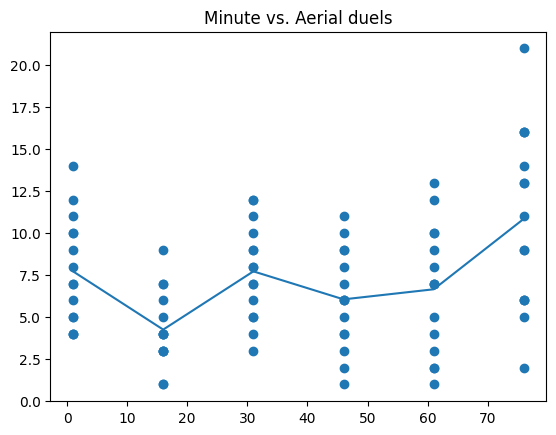

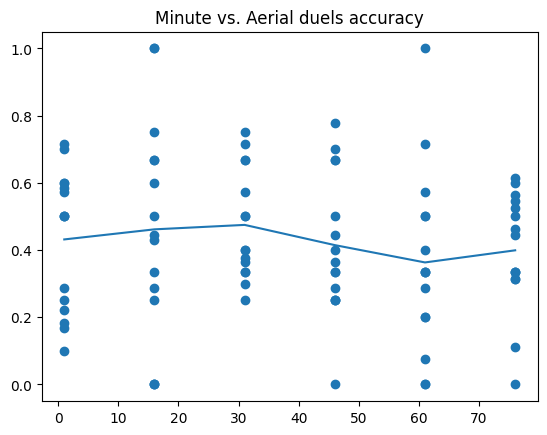

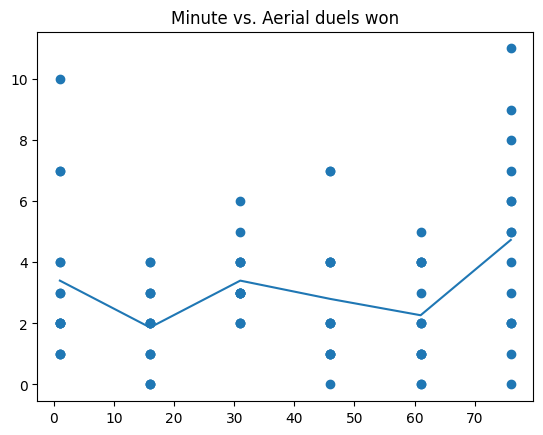

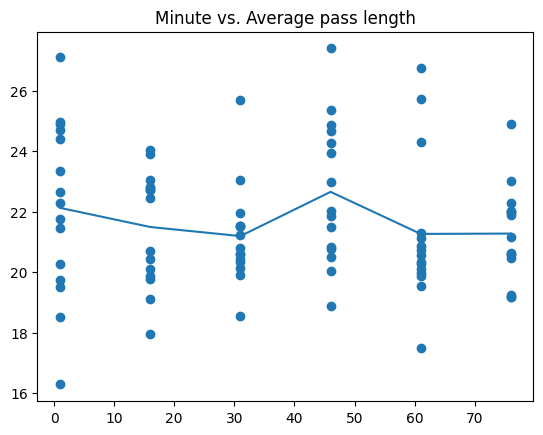

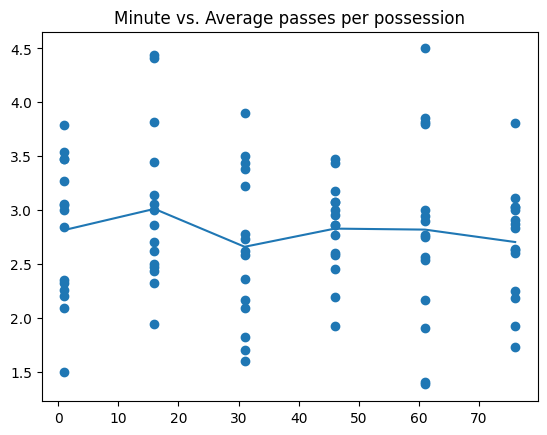

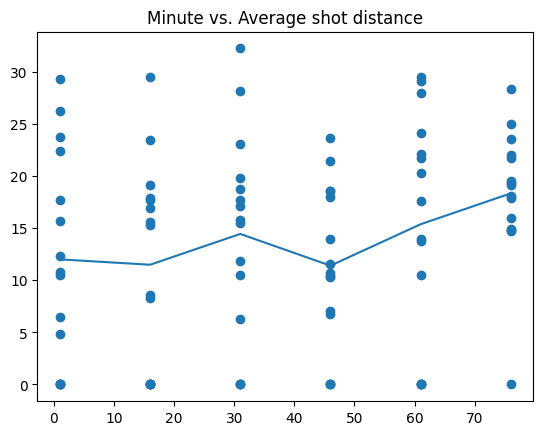

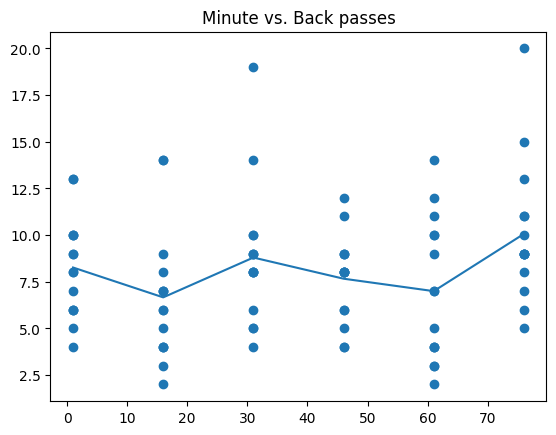

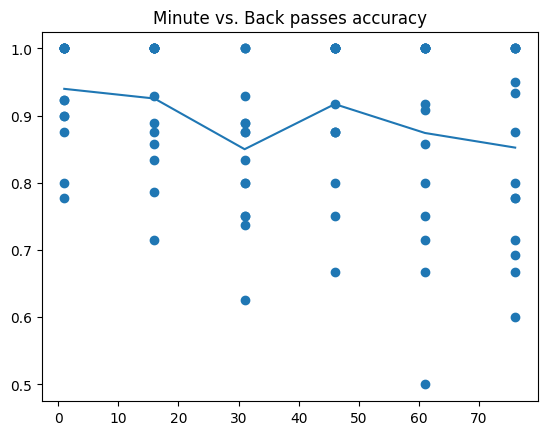

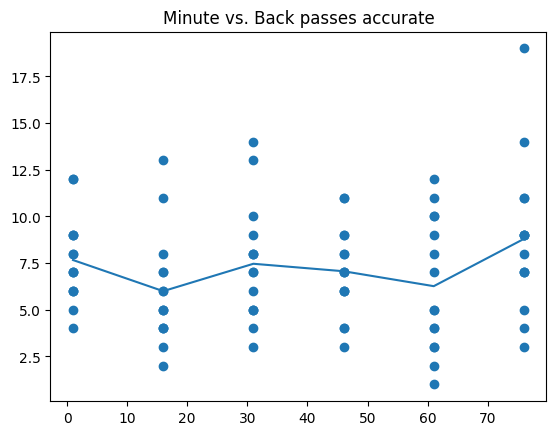

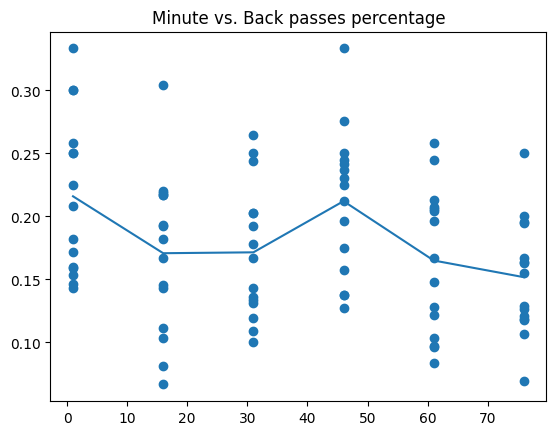

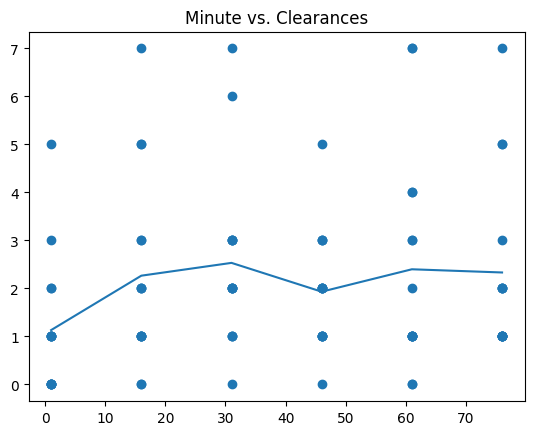

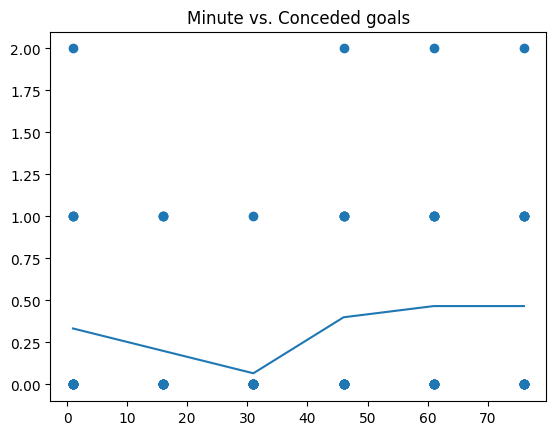

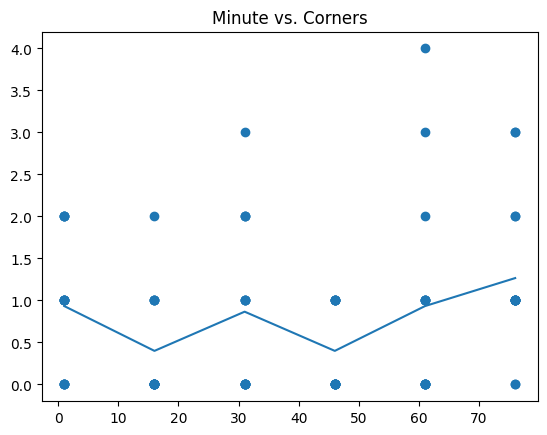

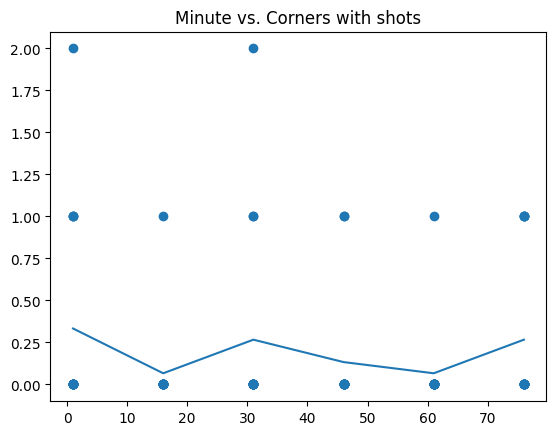

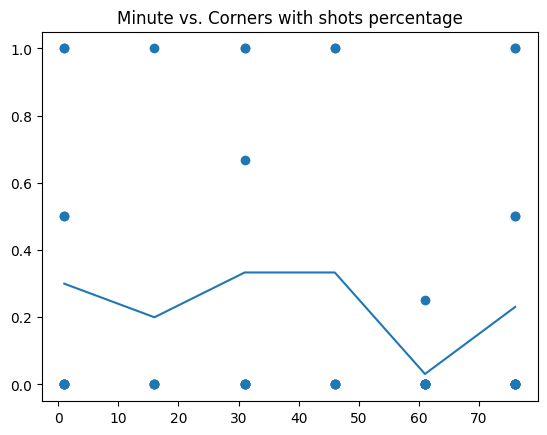

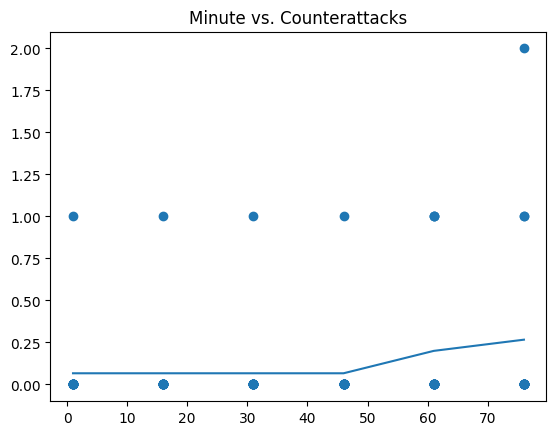

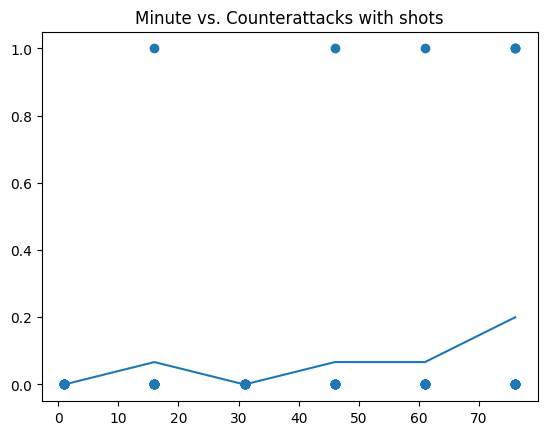

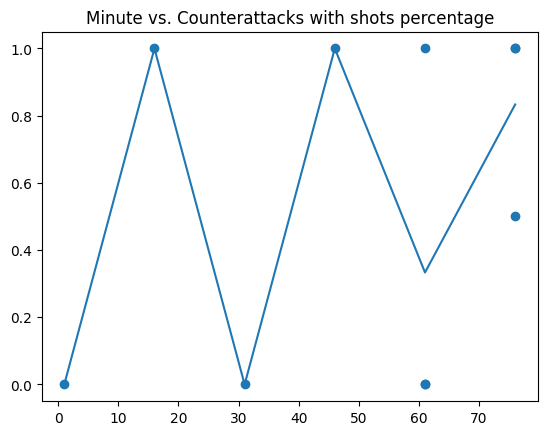

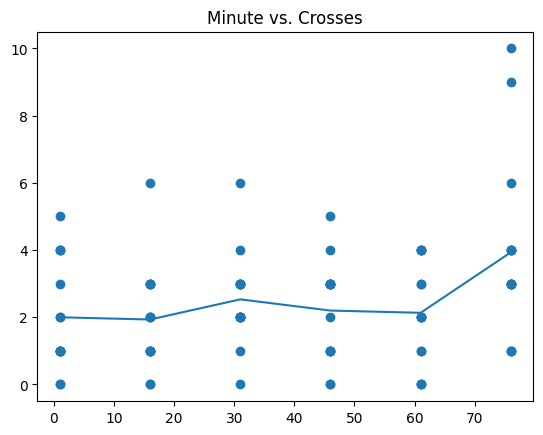

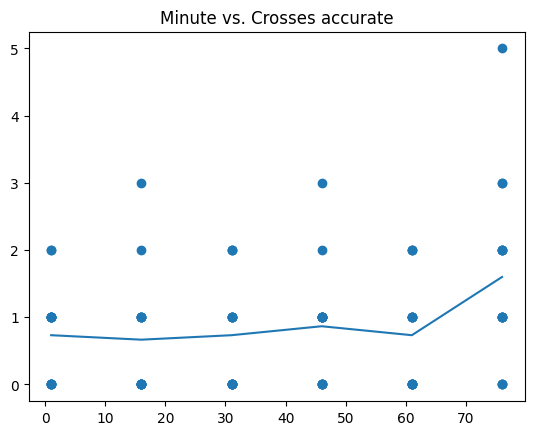

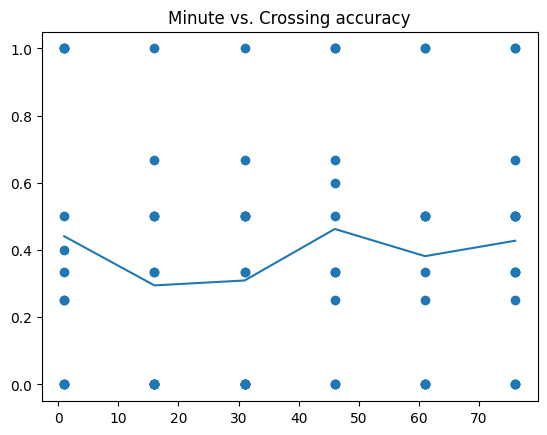

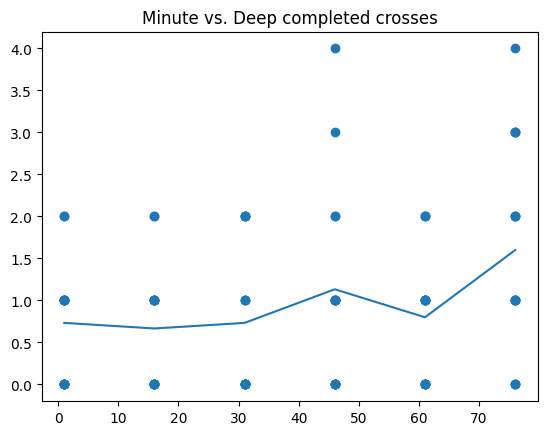

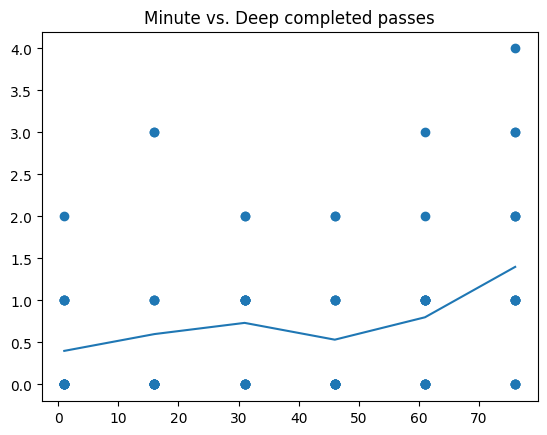

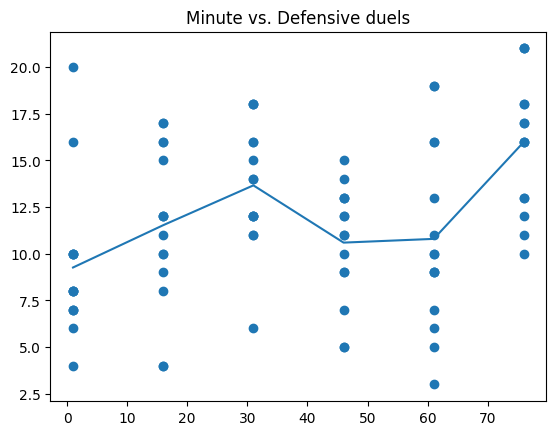

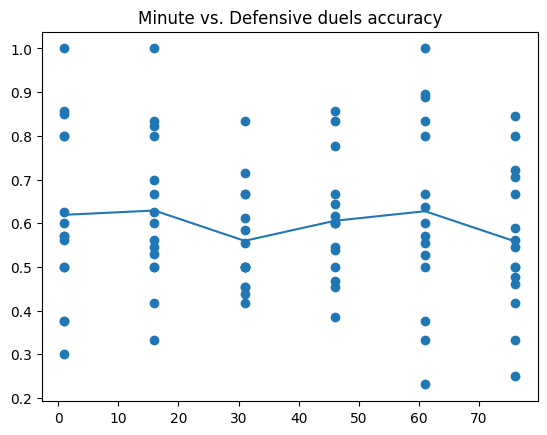

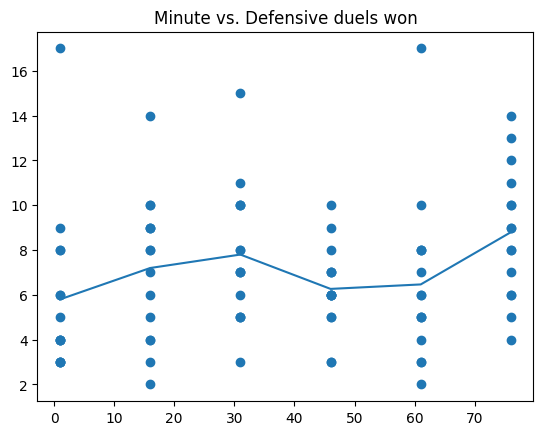

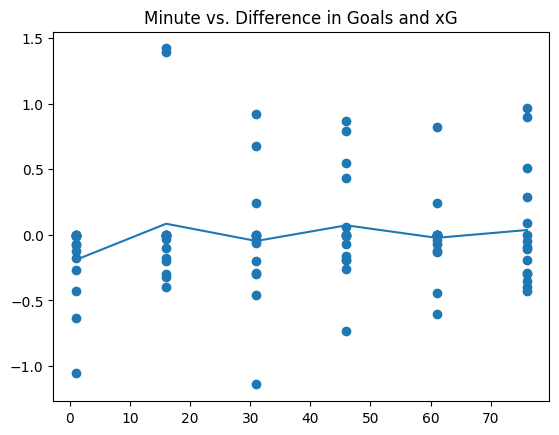

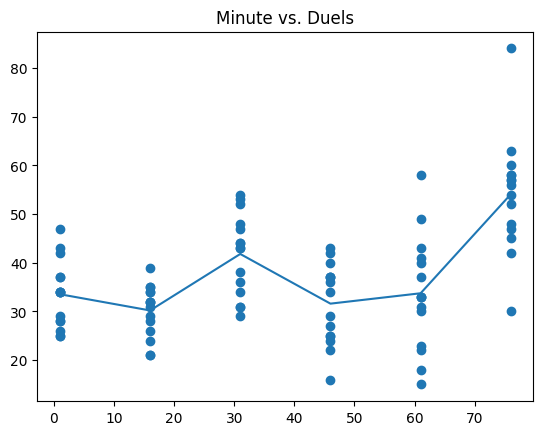

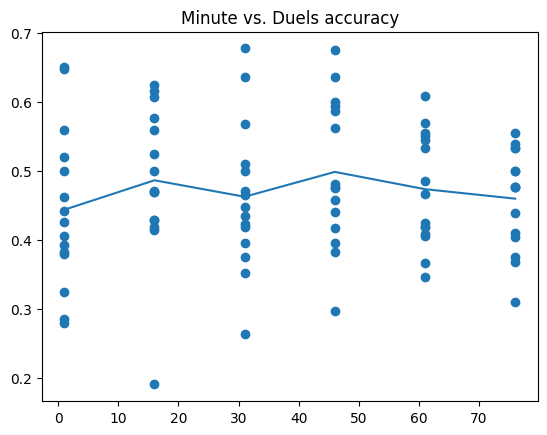

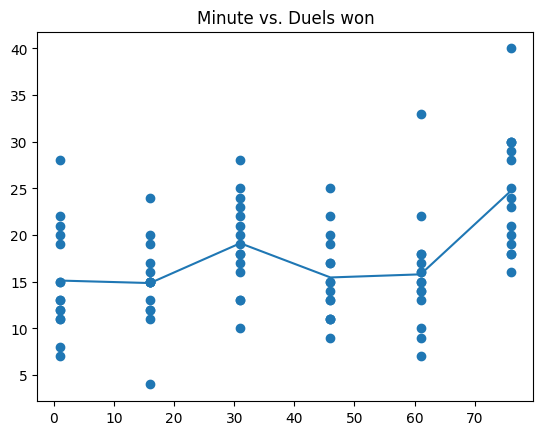

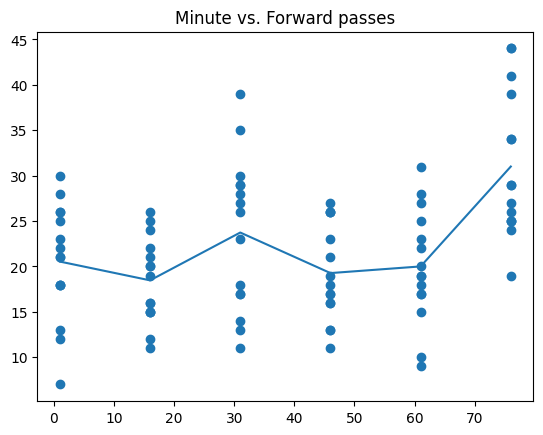

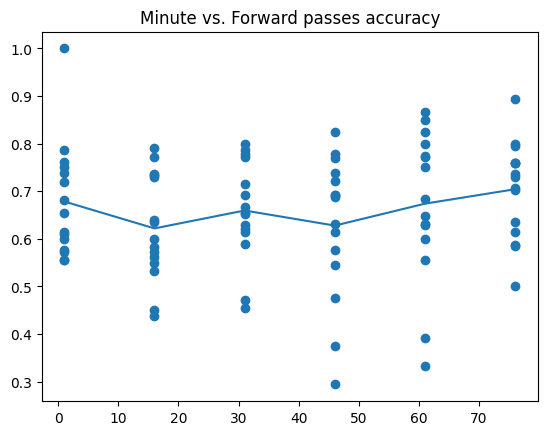

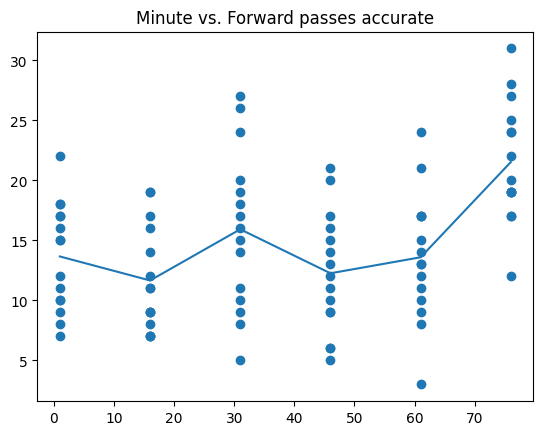

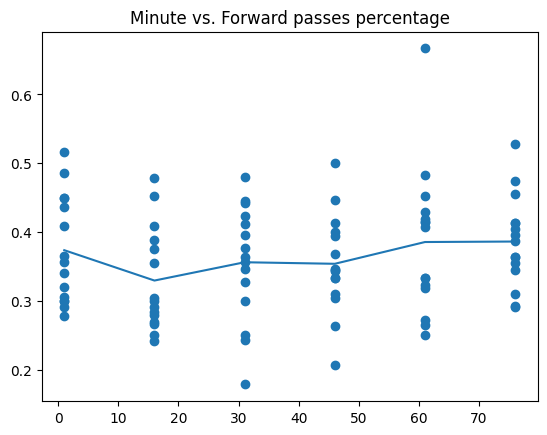

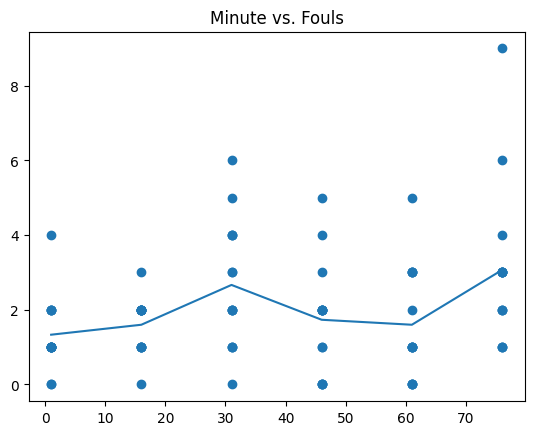

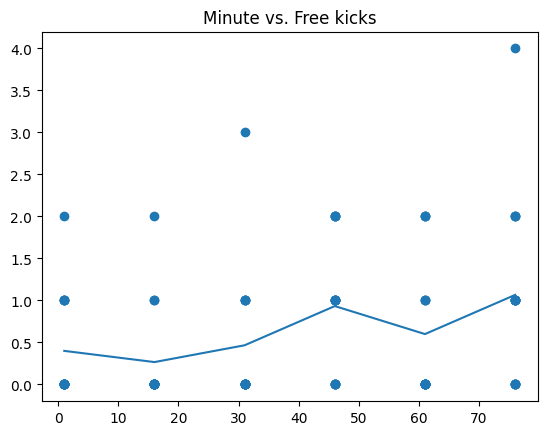

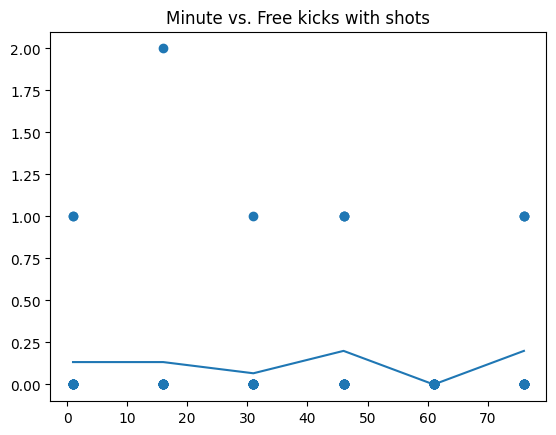

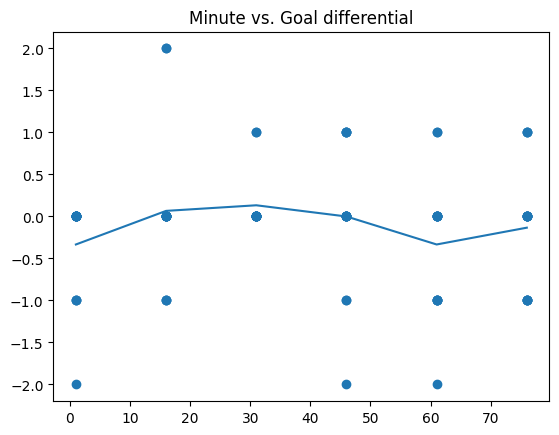

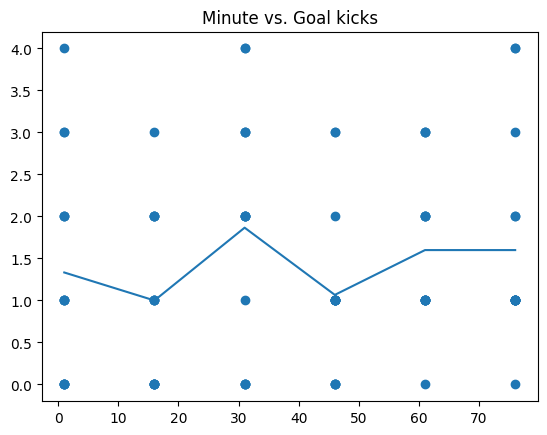

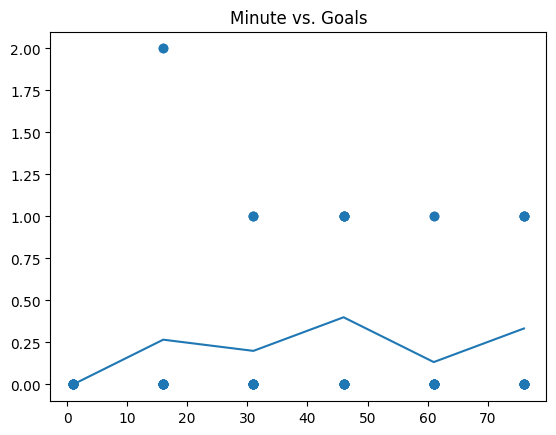

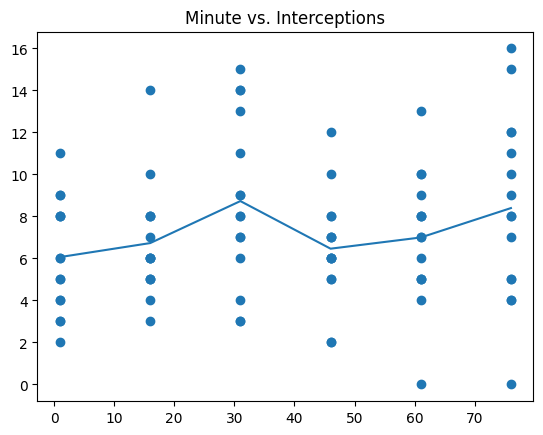

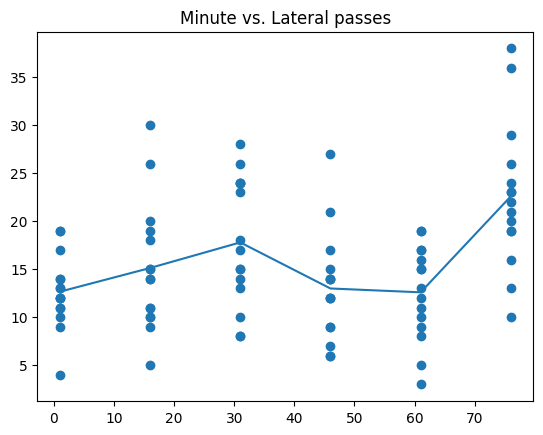

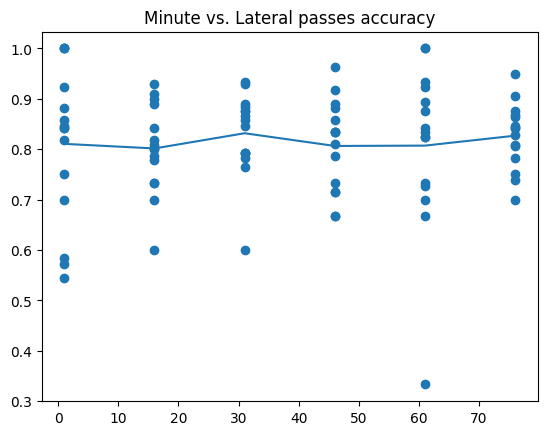

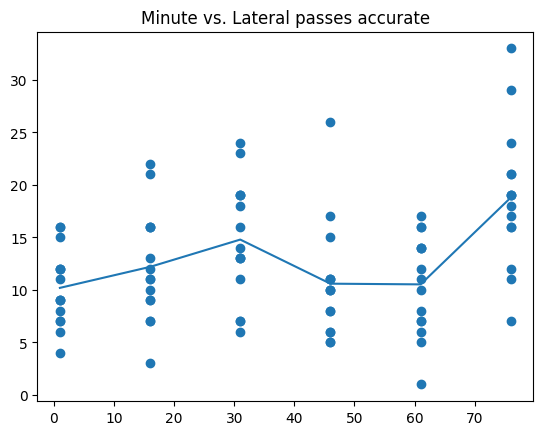

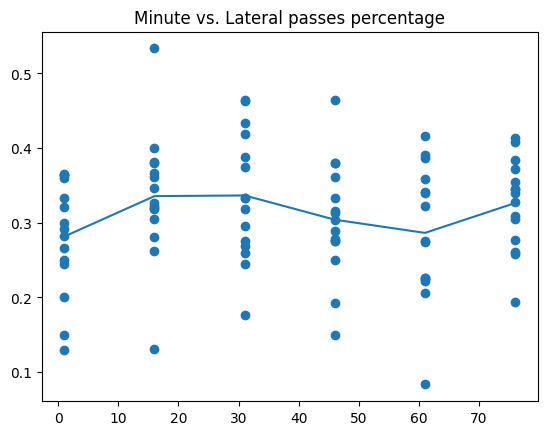

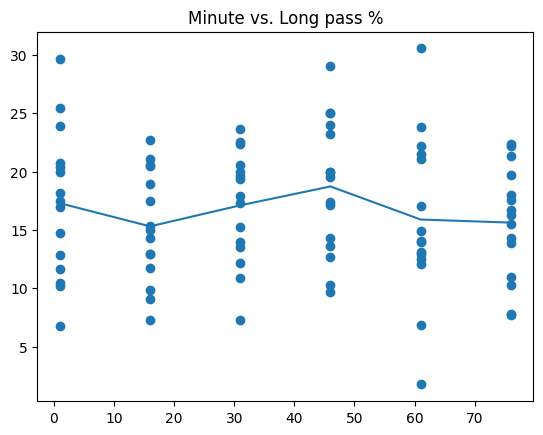

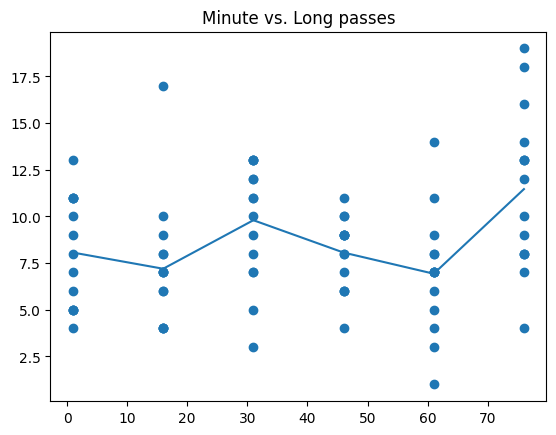

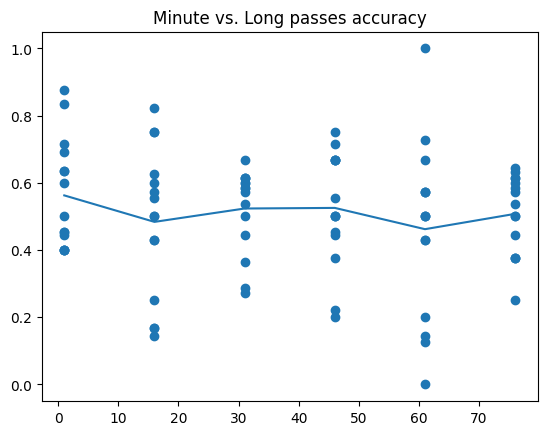

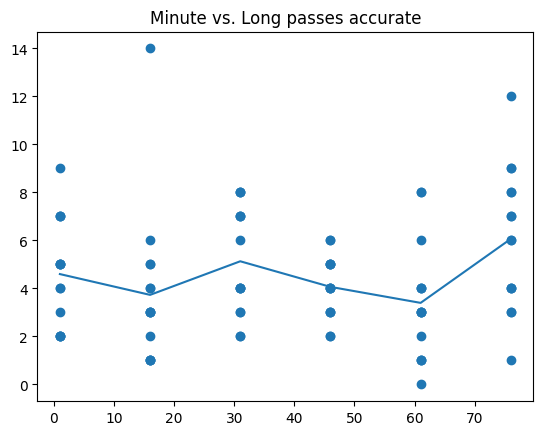

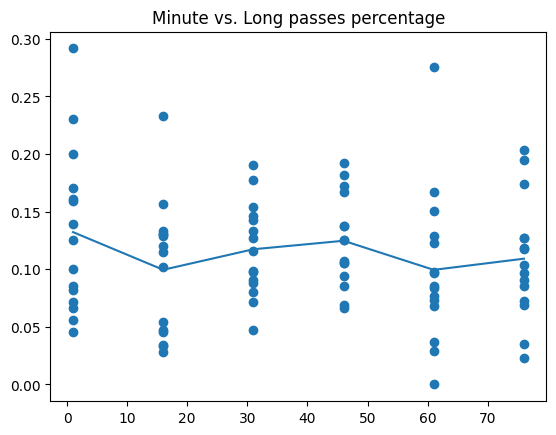

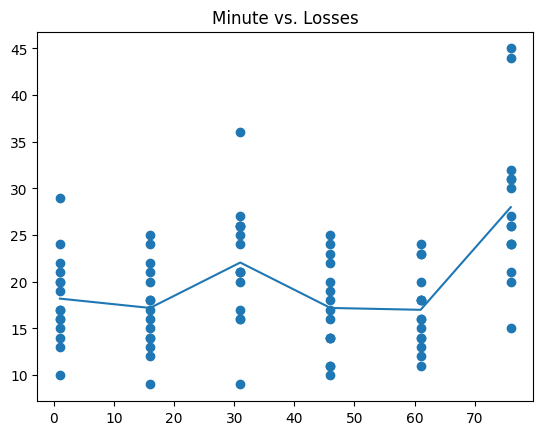

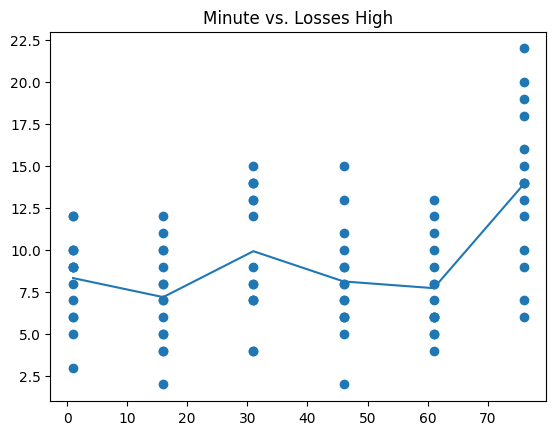

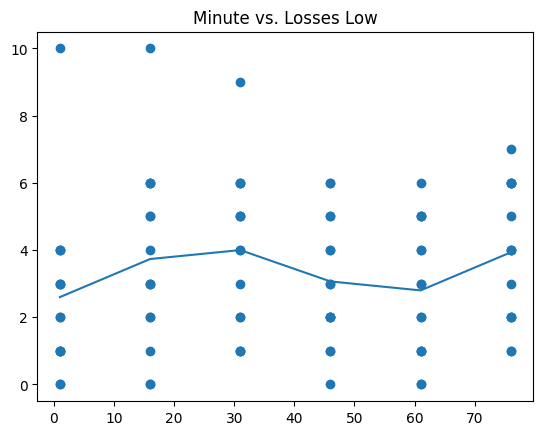

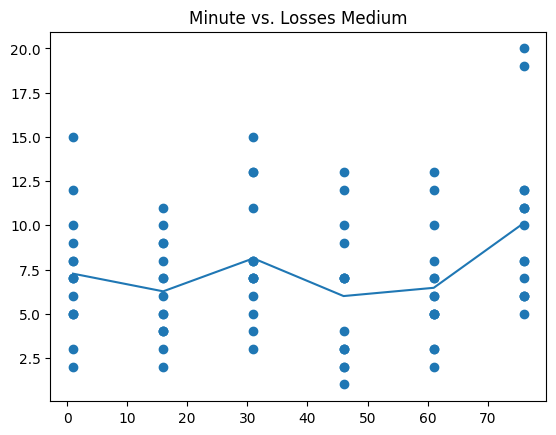

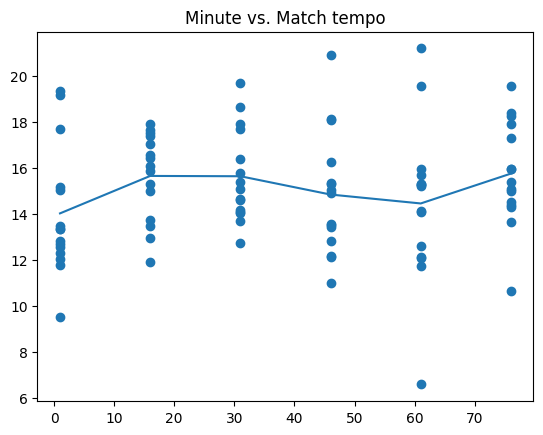

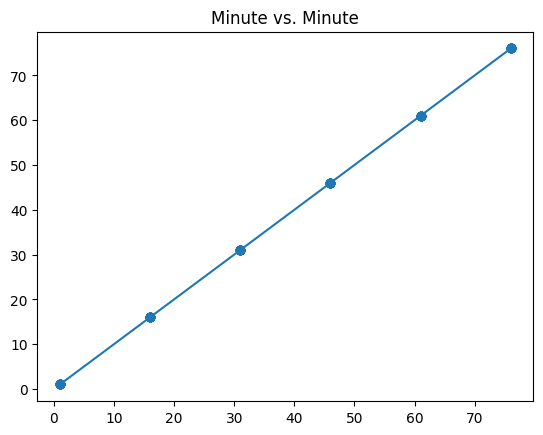

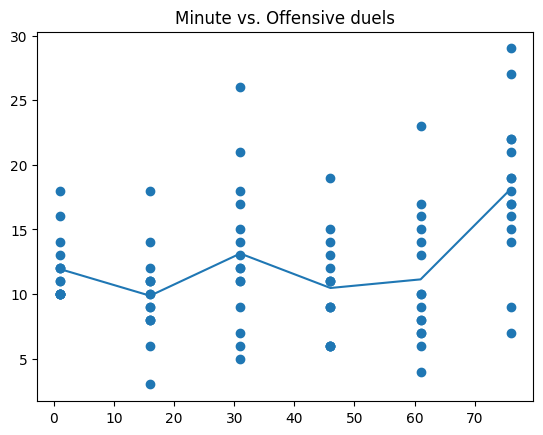

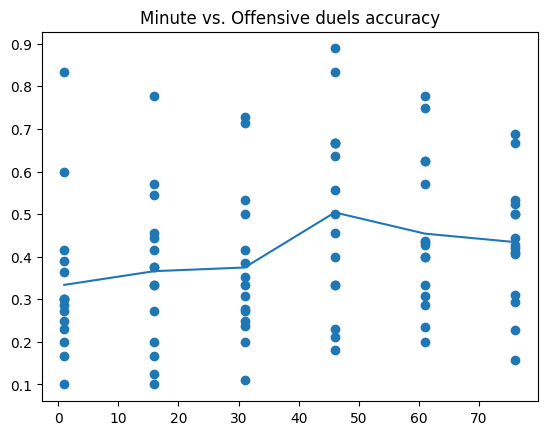

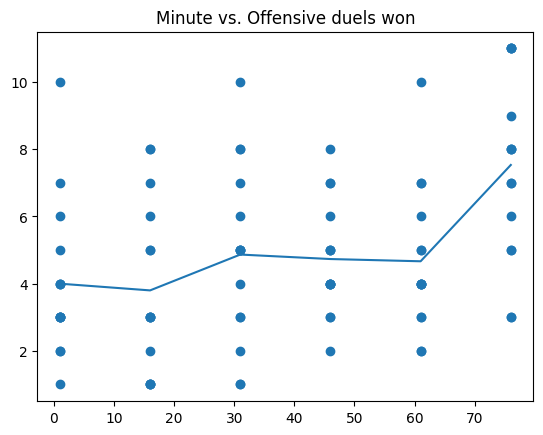

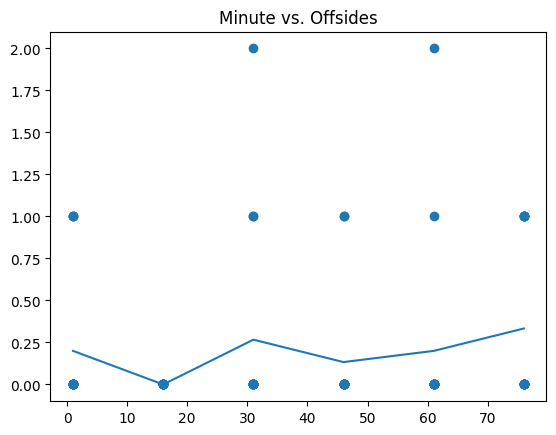

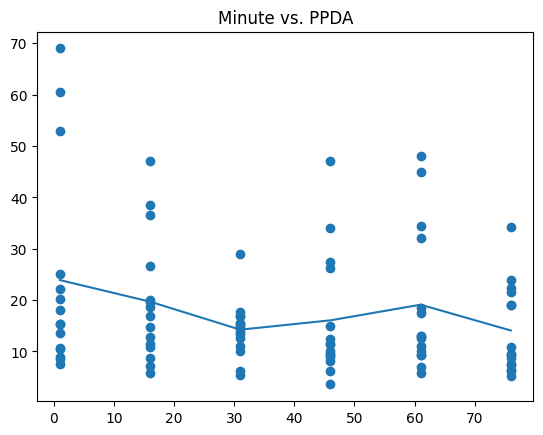

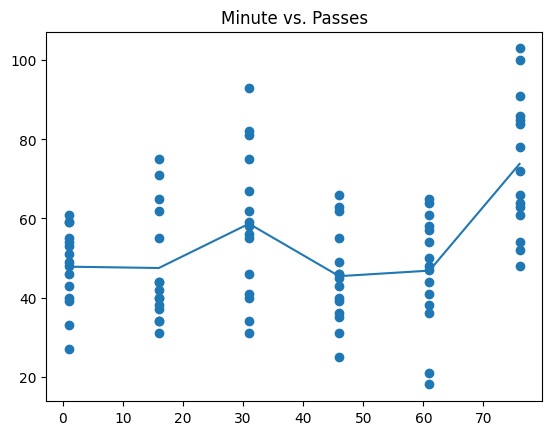

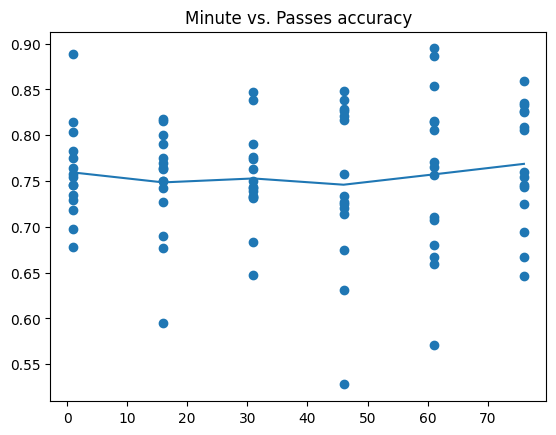

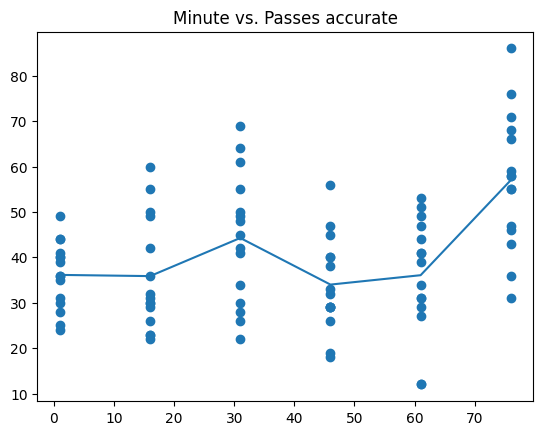

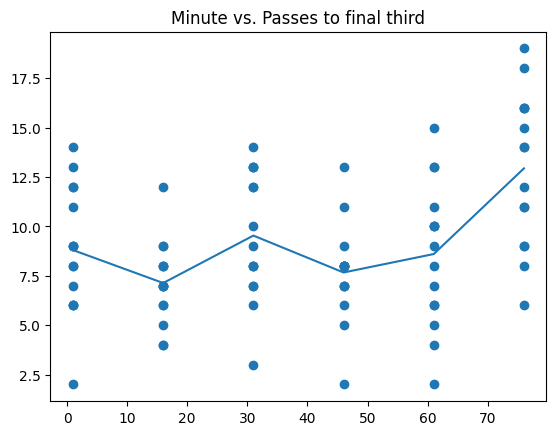

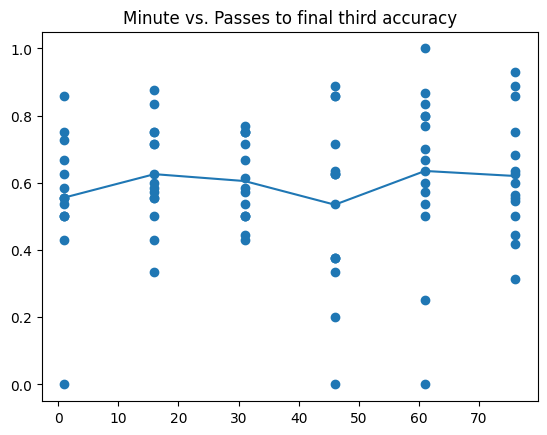

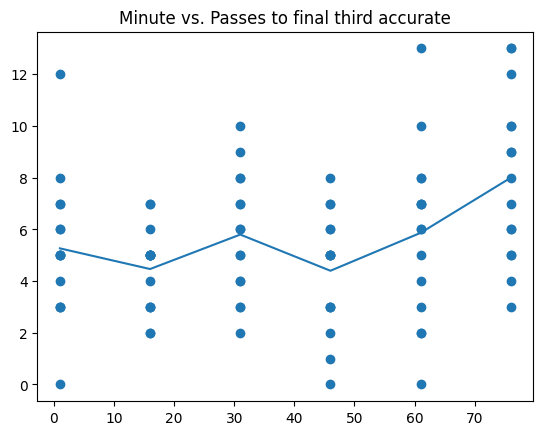

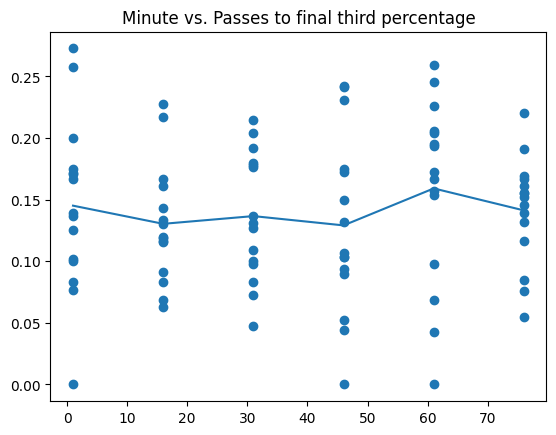

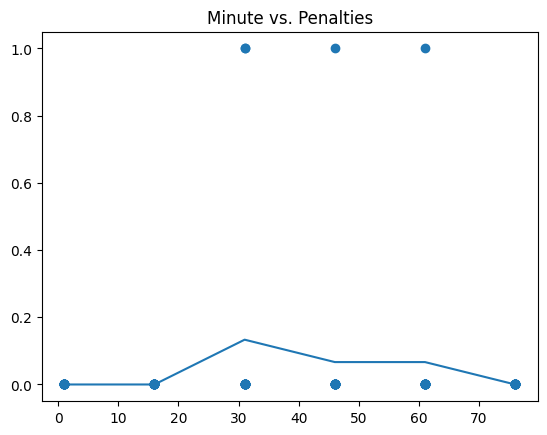

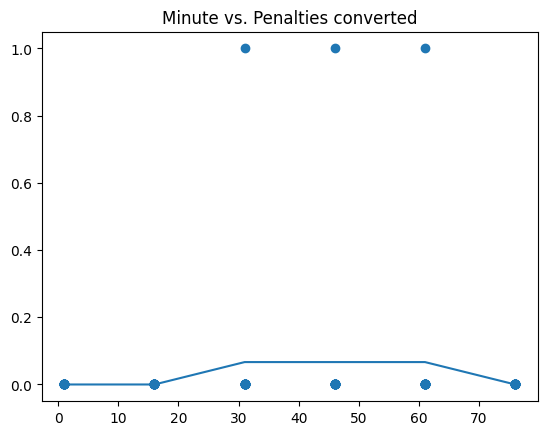

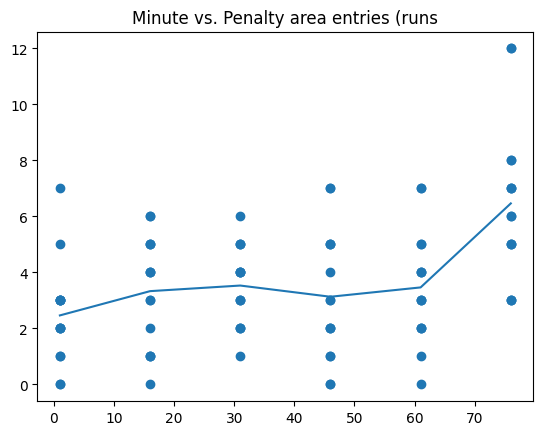

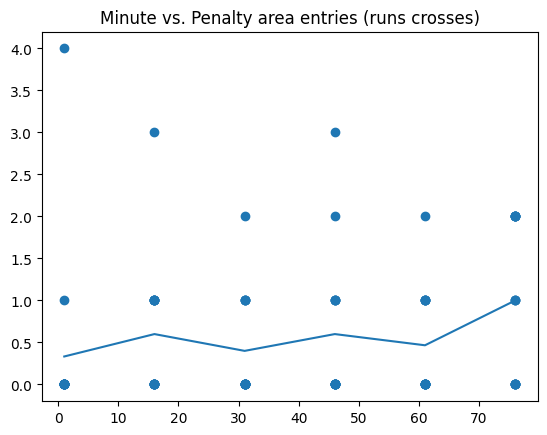

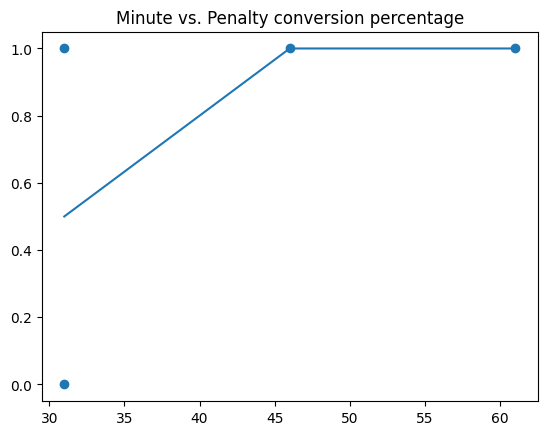

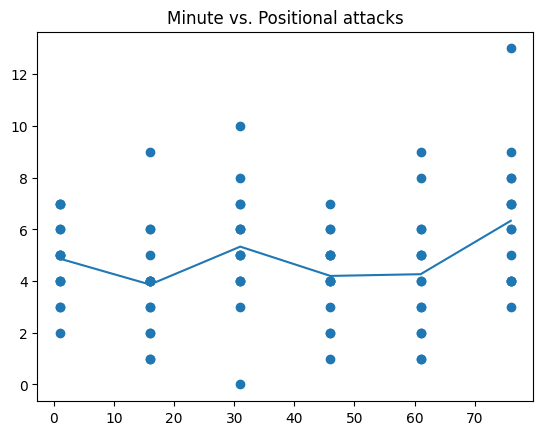

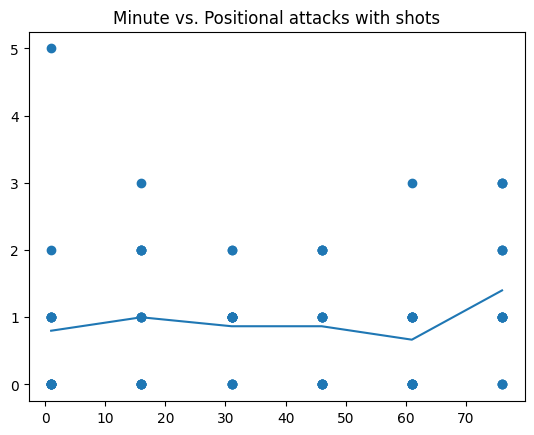

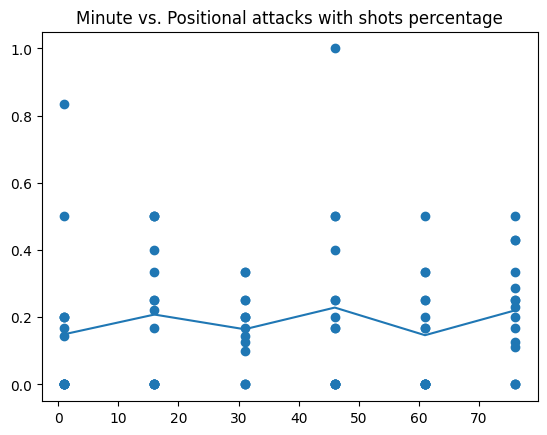

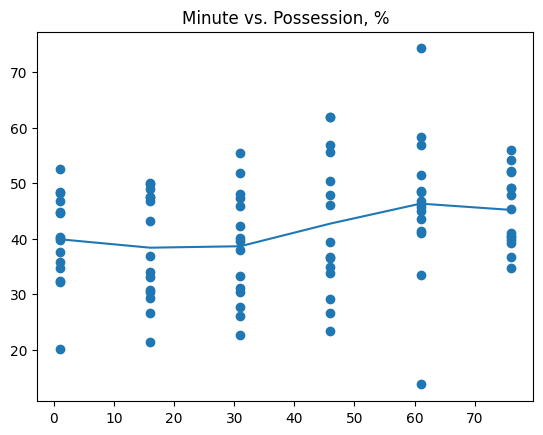

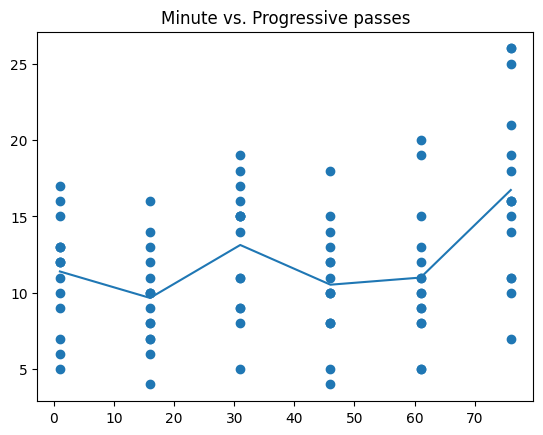

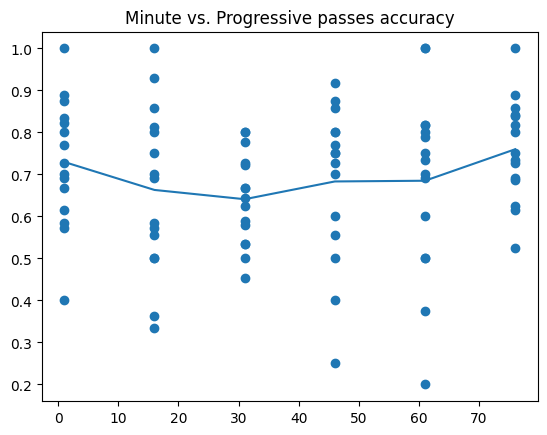

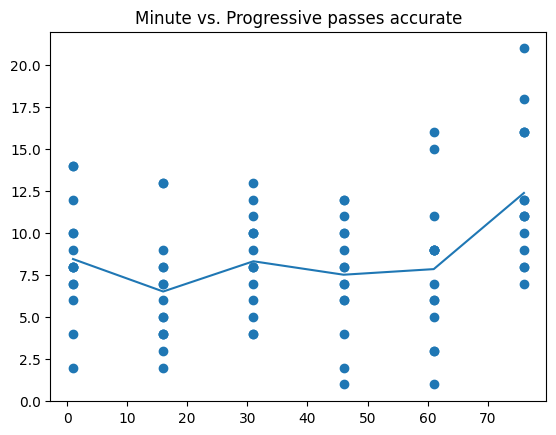

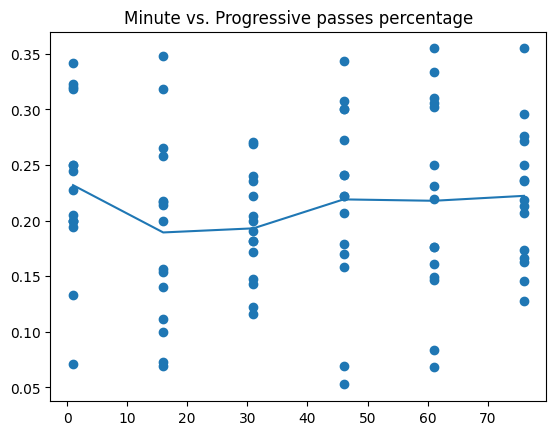

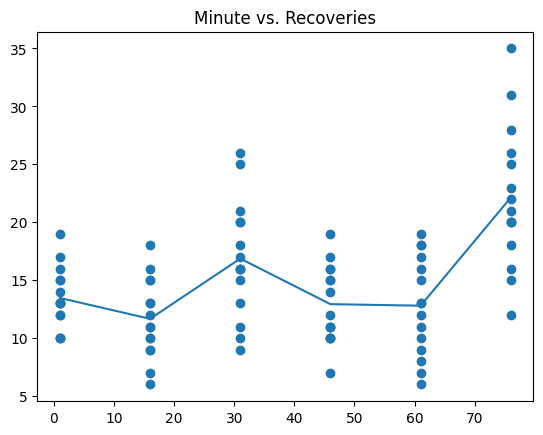

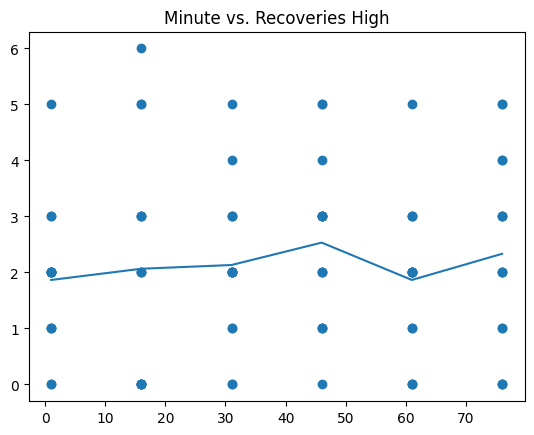

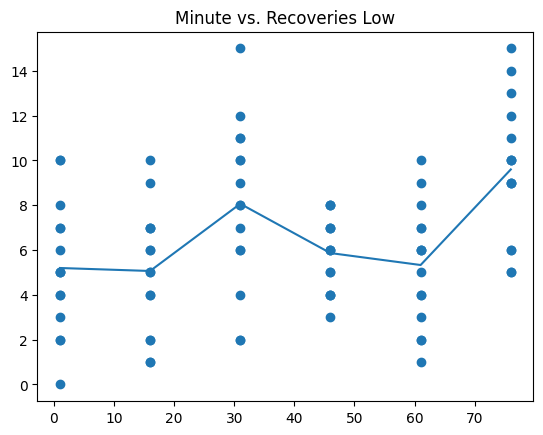

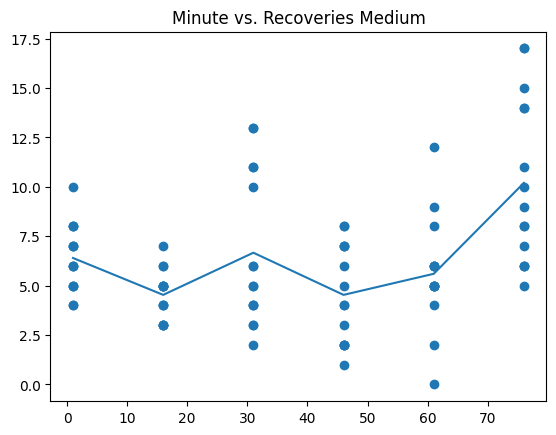

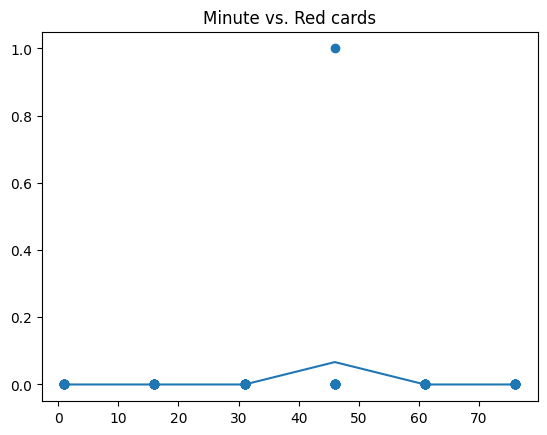

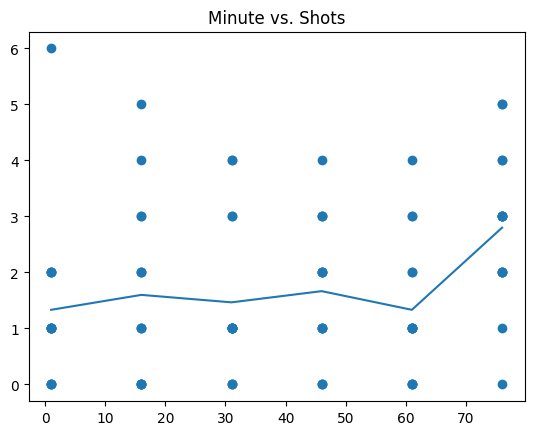

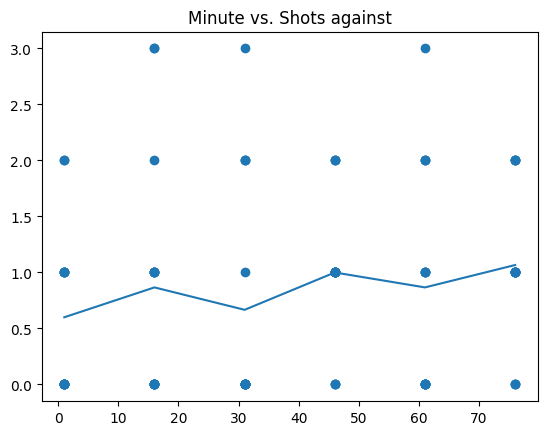

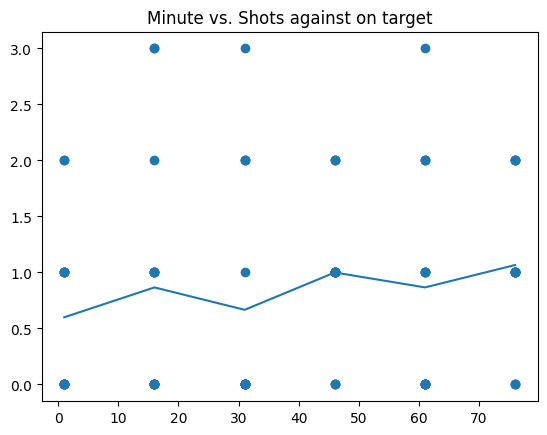

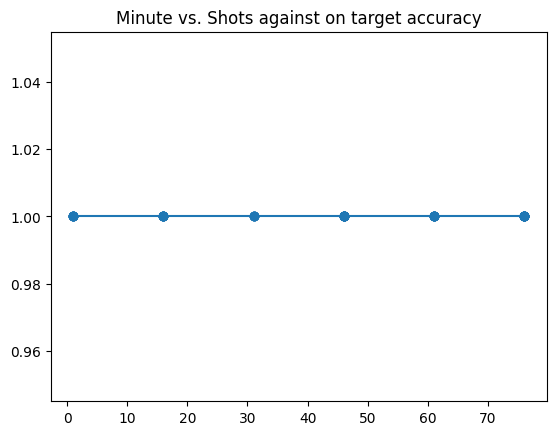

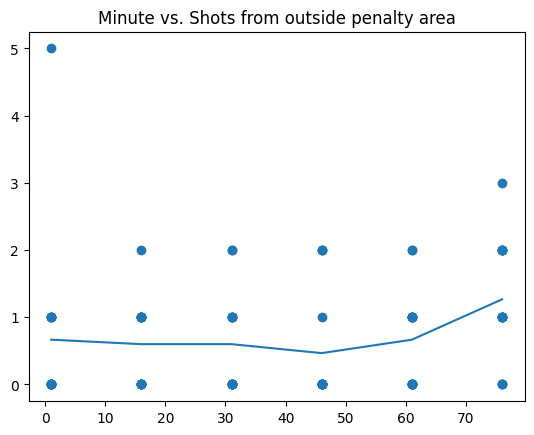

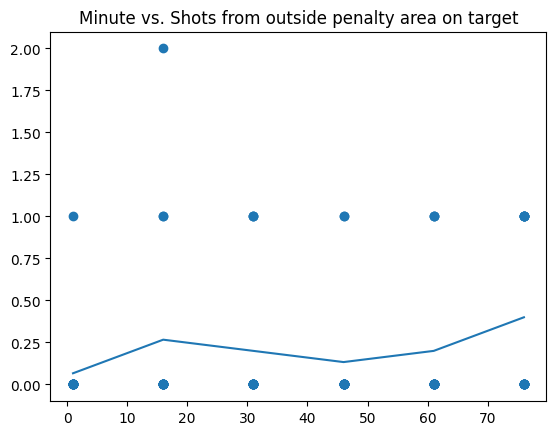

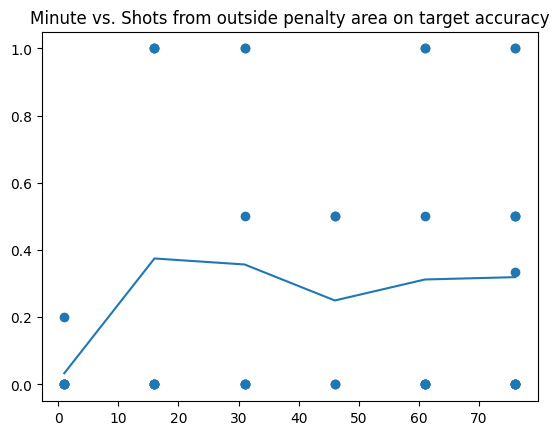

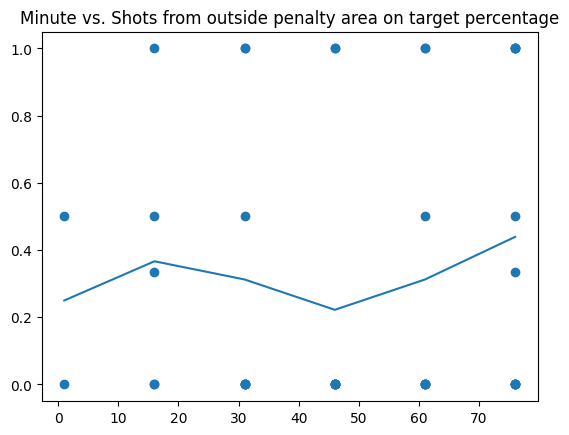

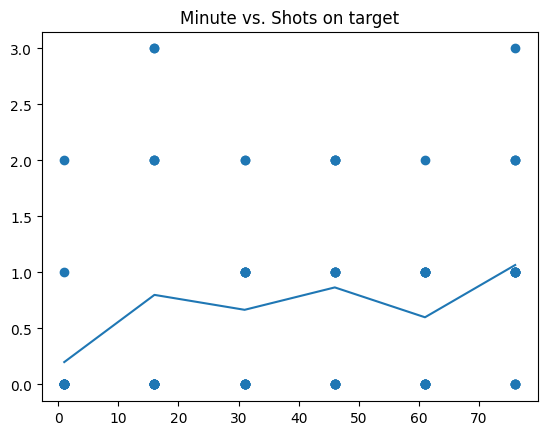

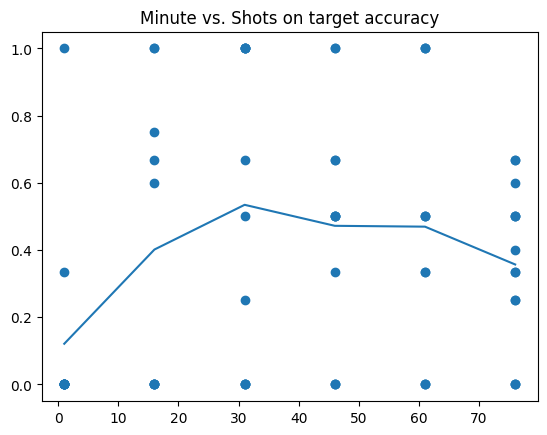

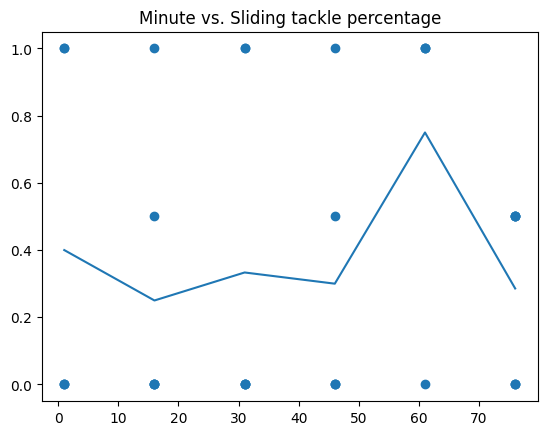

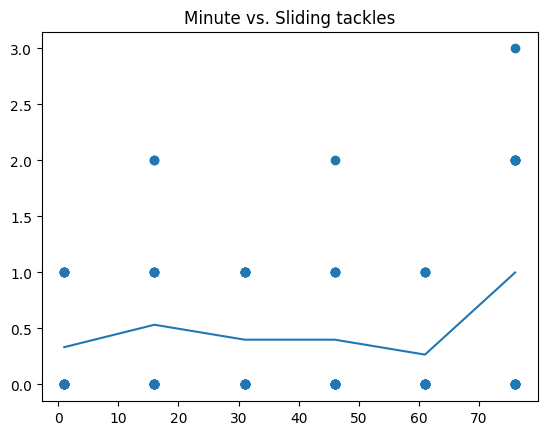

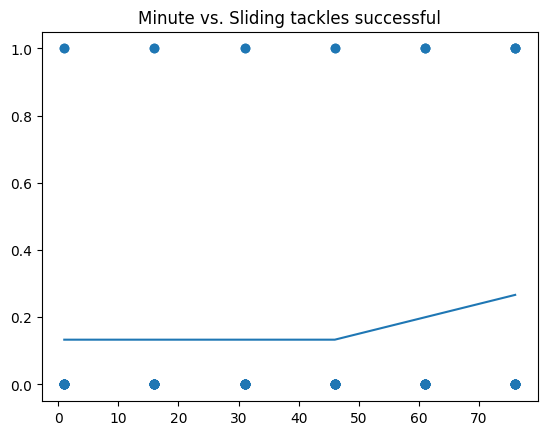

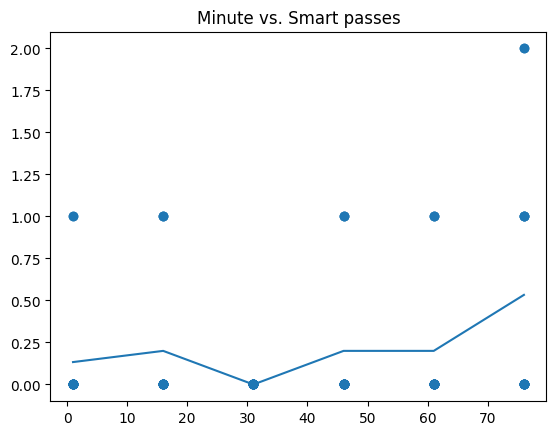

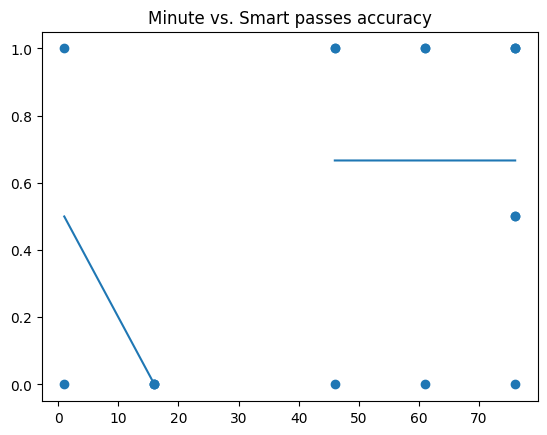

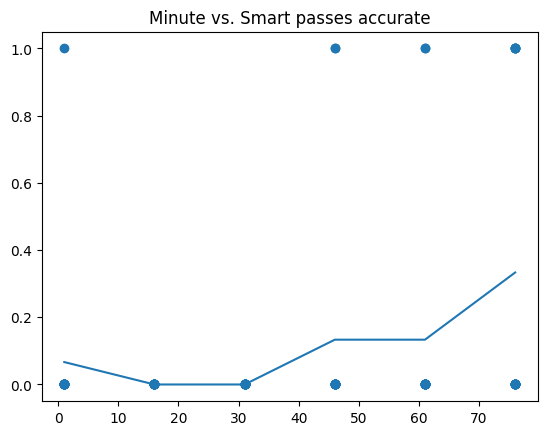

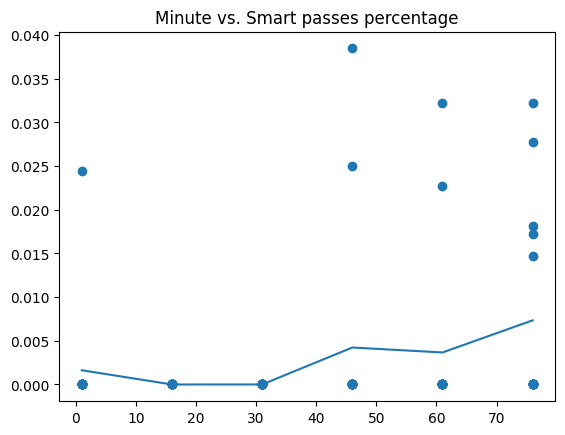

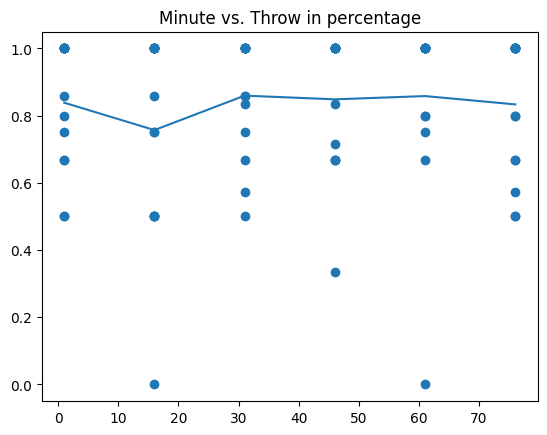

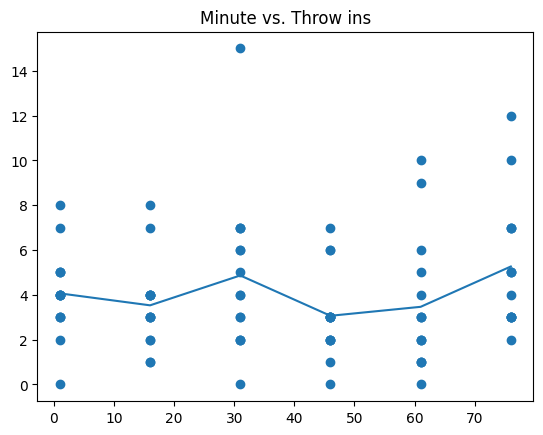

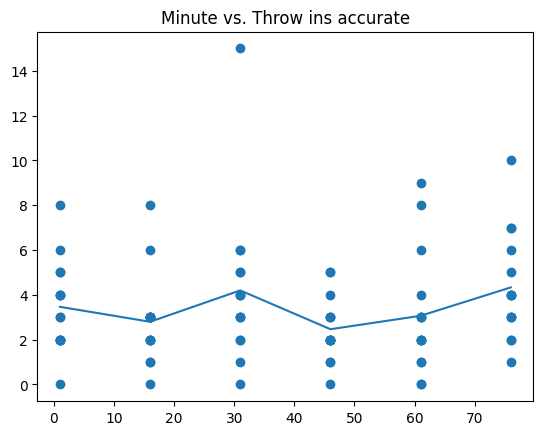

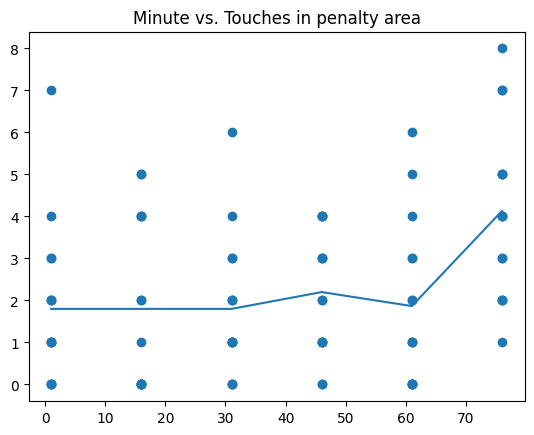

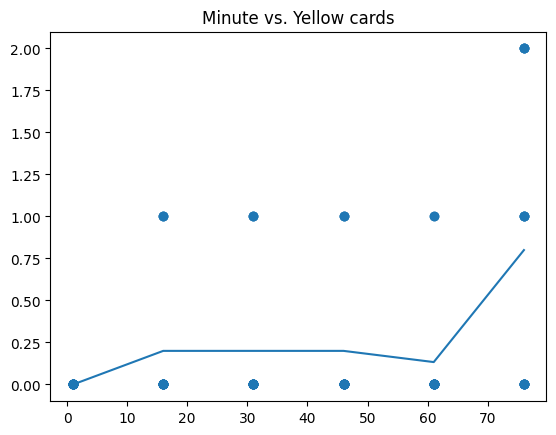

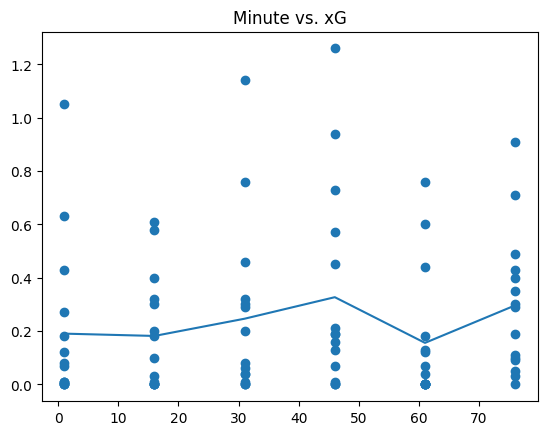

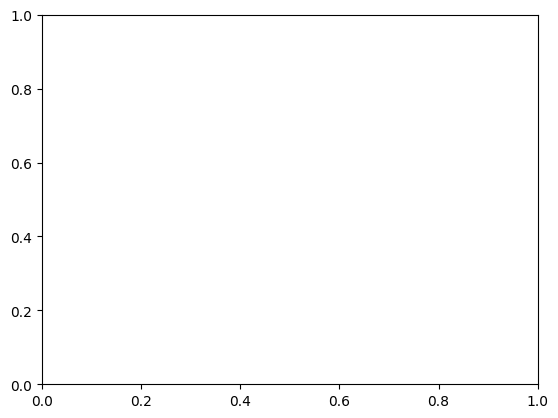

In [33]:
#General league shapes in stats
stats_ = ucsdData.columns.tolist()[6:]
minuteAverages = ucsdData.get(stats_).groupby("Minute").mean().reset_index()
for stat in stats_:
    plt.scatter(x=ucsdData.get("Minute"),y=ucsdData.get(stat))
    plt.plot(minuteAverages.get("Minute"),minuteAverages.get(stat))
    plt.title("Minute vs. "+stat)
    plt.show()
    #plt.savefig("ByMinute/"+stat+"ByMinute.png")
    plt.cla()